## Stat306 Project

In [22]:
library (tidyverse)
library (repr)

In [24]:
# read data
bikes<-read.csv("train_bikes.csv")
head(bikes)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>,<int>
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
3,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
4,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
5,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
6,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1


**Table 1:** the first 6 rows of bike-rental dataset

- `datetime` : date, from 31Dec10 to 19Dec12
- `season` : season (1: winter, 2: spring, 3: summer, 4: fall) is an explanatory categorical variable here, categorized by four seasons.
- `holiday` : an explanatory categorical variable here, 0 for not holiday, 1 for holiday.
- `workingday` : This is a binary categorical variable. If the day is a working day, it is 1, otherwise it is 0.
- `weather` : weather at the day of rental, 1 for best weather, 4 for worst, ranking from 1 to 4.
- `temp` : Normalized temperature in Celsius.
- `atemp`: Normalized feeling temperature in Celsius.
- `humidity`: Normalized humidity. The values are divided from0(min) to 100 (max).
- `windspeed`: Normalized wind speed. The values are divided from 0(min) to 57 (max).
- `casual`: count of casual users, continuous.
- `registered`: count of registered users, continuous.
- `count`: count of total rental bikes including both casual andregistered, continuous response variable.

In [38]:
#check the data set if has the missing data
anyNA(bikes)

[1] FALSE

In [33]:
#factorize categorical variables
bikes$season <- as.factor(bikes$season)
bikes$holiday <- as.factor(bikes$holiday)
bikes$workingday <- as.factor(bikes$workingday)
bikes$weather <- as.factor(bikes$weather)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

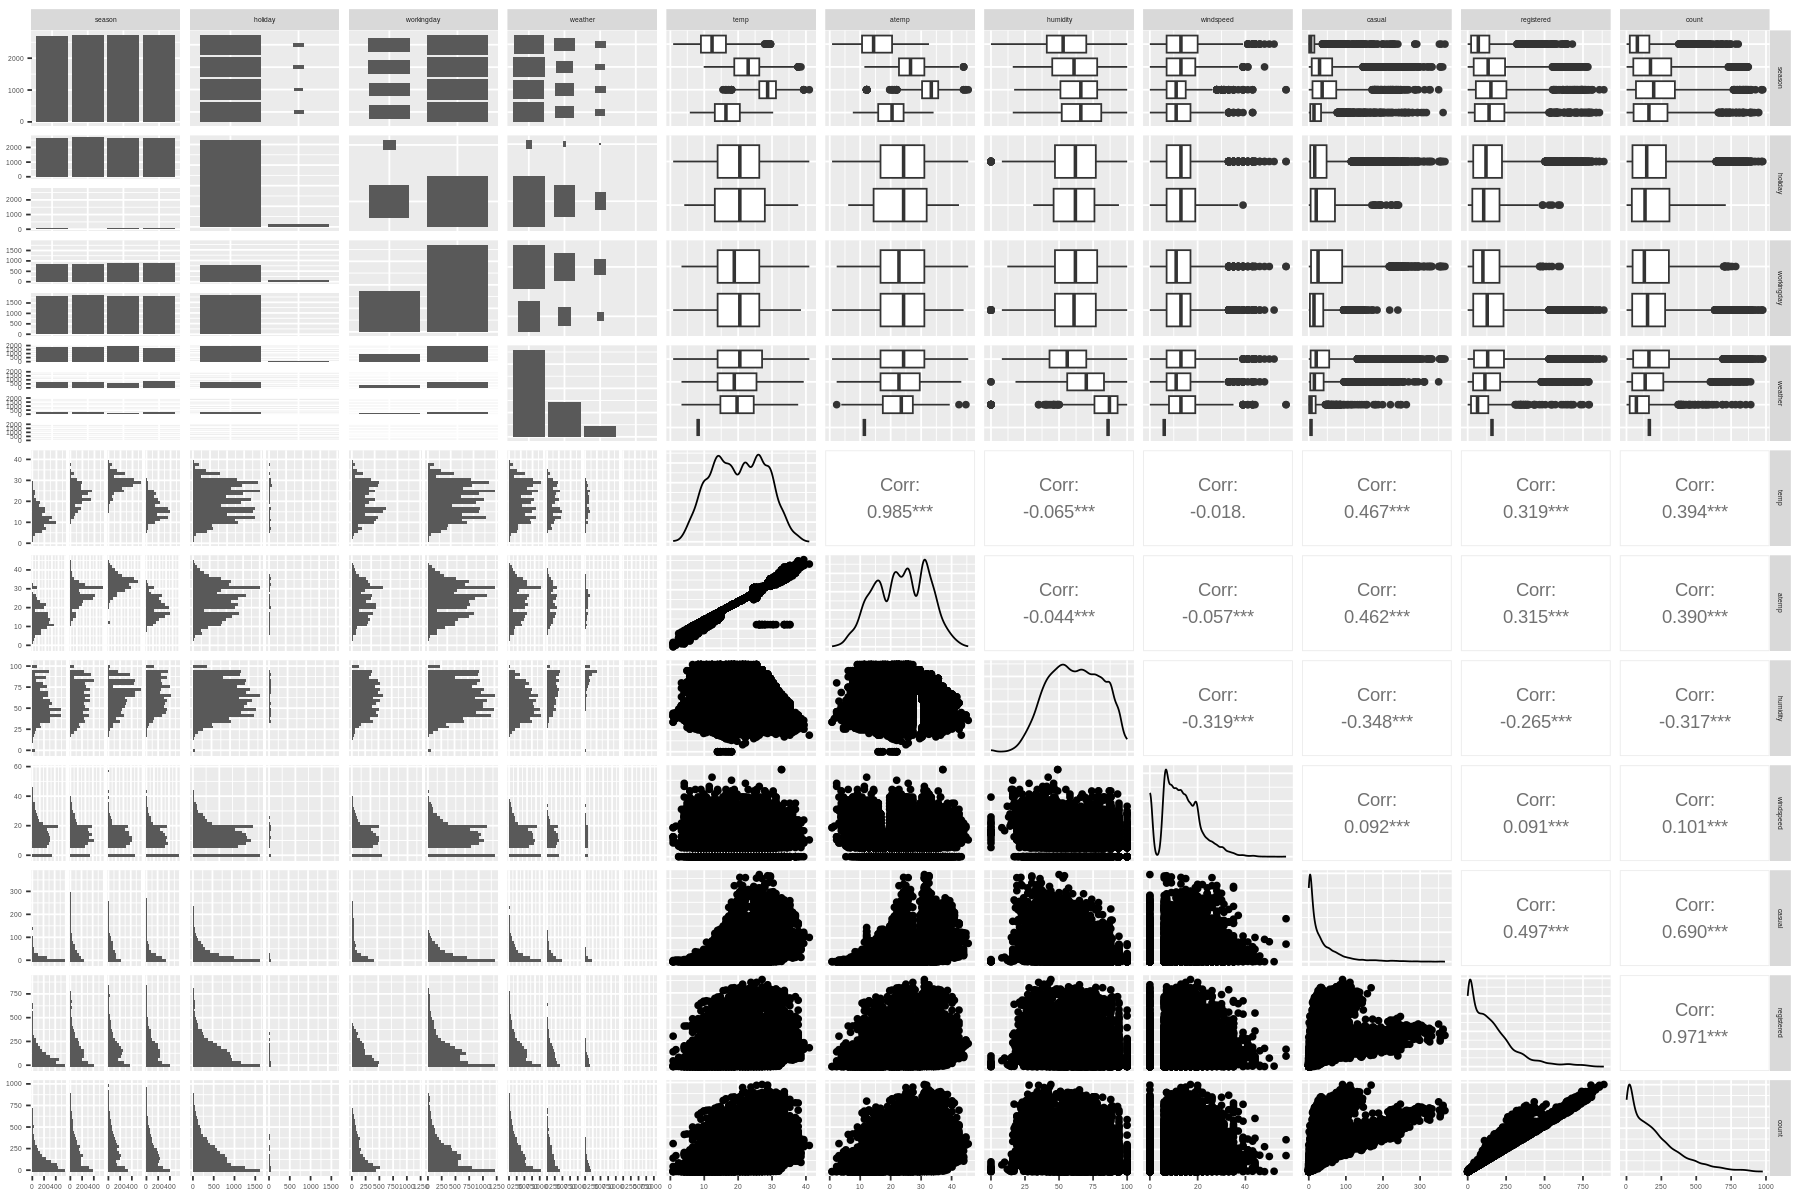

In [34]:
options(repr.plot.width = 15, repr.plot.height = 10)
bikes_pair_plots <- bikes %>%
  select(- datetime) %>% 
  ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 5),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
  )
bikes_pair_plots

**Figure 1:** Pair plot for explanatory and response variables of flight_data

* analysis the correlation between `COUNT` and the rest continous variables
* fliter out all categorical variables and just explore the correlation between continuous variables

In [39]:
corr_matrix_bikes <- bikes %>%
  select(- datetime,-season,-holiday,-workingday,-weather) %>% 
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")

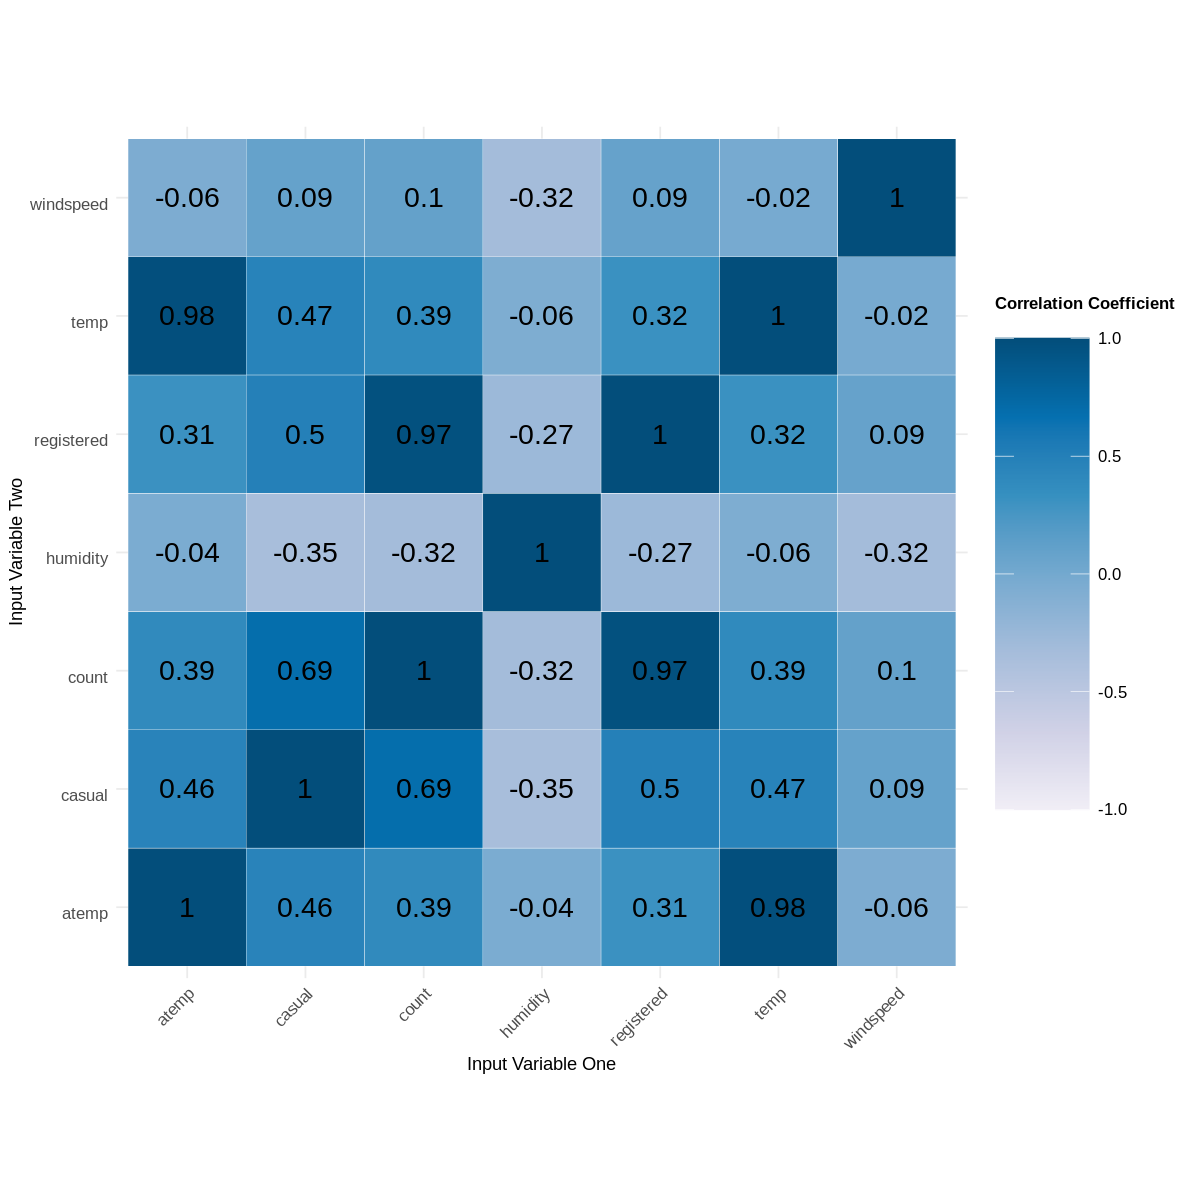

In [36]:
options(repr.plot.width = 10, repr.plot.height = 10)
corr_matrix_bikes_plot <- corr_matrix_bikes %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette =  "PuBu",
    direction = 1, limits = c(-1,1)
  ) +
  labs(x = "Input Variable One", y = "Input Variable Two") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 10, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 10, hjust = 1
    ),
    legend.title = element_text(size = 10, face = "bold"),
    legend.text = element_text(size = 10),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)
corr_matrix_bikes_plot